In [1]:
import cv2
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt
import imutils
from imutils import paths

In [2]:
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,self.radius, method="uniform")
        n_bins = int(lbp.max() + 1)
        #(hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, self.numPoints + 3),range=(0, self.numPoints + 2))
        (hist, _) = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
        # normalize the histogram
        #hist = hist.astype("float")
        #hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist

In [3]:
descLBP = LocalBinaryPatterns(8, 3)

In [4]:
def chi2_distance(histA, histB, eps = 1e-10):
	# compute the chi-squared distance
	d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
		for (a, b) in zip(histA, histB)])
	# return the chi-squared distance
	return d

In [5]:
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

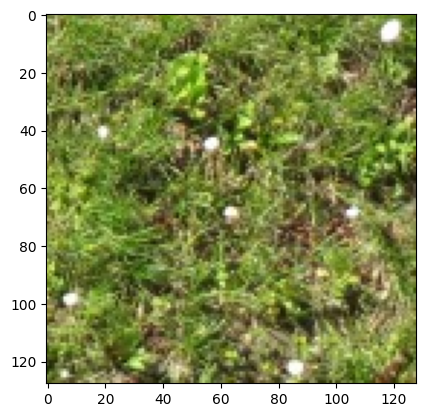

In [6]:
image1 = cv2.imread('Texture/jpg/Grass/Grass.0000.01.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

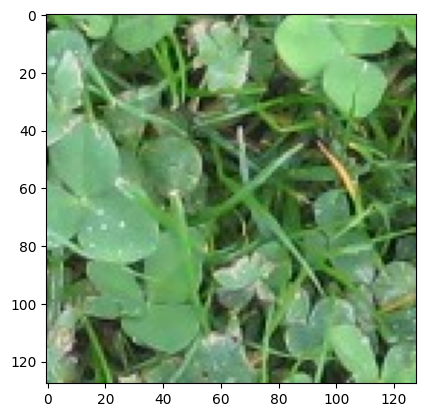

In [7]:
image2 = cv2.imread('Texture/jpg/Grass/Grass.0001.07.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

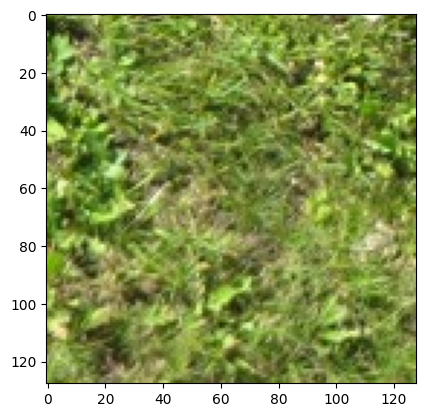

In [8]:
image3 = cv2.imread('Texture/jpg/Grass/Grass.0000.13.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(image3)
gray3 = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)

In [9]:
hist1 = descLBP.describe(gray1)
hist2 = descLBP.describe(gray2)
hist3 = descLBP.describe(gray3)

In [10]:
hist1

array([0.11053467, 0.11138916, 0.05108643, 0.04064941, 0.03417969,
       0.04663086, 0.04833984, 0.10217285, 0.09844971, 0.35656738])

In [11]:
d = chi2_distance(hist1, hist2)
d

np.float64(0.021110258811176785)

In [12]:
dk=kullback_leibler_divergence(hist1,hist2)
dk

np.float64(0.057883473422593576)

In [13]:
d = chi2_distance(hist2, hist3)
d

np.float64(0.015754001033758826)

In [14]:
dk=kullback_leibler_divergence(hist2,hist3)
dk

np.float64(0.049417994299174886)

In [15]:
d = chi2_distance(hist1, hist3)
d

np.float64(0.0006715774971974294)

In [16]:
dk=kullback_leibler_divergence(hist1,hist3)
dk

np.float64(0.0019100165873997543)

In [17]:
imagePaths = list(paths.list_images('Texture/jpg/Grass/'))

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols=1, titles=None):
    n_images = len(images)
    if titles is None:
        titles = [''] * n_images

    fig = plt.figure(figsize=(15, 8))

    n_rows = int(np.ceil(n_images / float(cols)))

    for n, (image, title) in enumerate(zip(images, titles)):
        ax = fig.add_subplot(n_rows, cols, n + 1)
        if image.ndim == 2:
            plt.gray()
        ax.imshow(image)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [19]:
i=0
dlist=[]
for (i, imagePath) in enumerate(imagePaths):
    # load the input image
    print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
    imagedb = cv2.imread(imagePath)
    imagedb = cv2.cvtColor(imagedb, cv2.COLOR_BGR2RGB)
    graydb = cv2.cvtColor(imagedb, cv2.COLOR_RGB2GRAY)
    histdb = descLBP.describe(graydb)
    d=kullback_leibler_divergence(histdb, hist1)
    dlist.append((d,imagePath))

[INFO] processing image 1/64
[INFO] processing image 2/64
[INFO] processing image 3/64
[INFO] processing image 4/64
[INFO] processing image 5/64
[INFO] processing image 6/64
[INFO] processing image 7/64
[INFO] processing image 8/64
[INFO] processing image 9/64
[INFO] processing image 10/64
[INFO] processing image 11/64
[INFO] processing image 12/64
[INFO] processing image 13/64
[INFO] processing image 14/64
[INFO] processing image 15/64
[INFO] processing image 16/64
[INFO] processing image 17/64
[INFO] processing image 18/64
[INFO] processing image 19/64
[INFO] processing image 20/64
[INFO] processing image 21/64
[INFO] processing image 22/64
[INFO] processing image 23/64
[INFO] processing image 24/64
[INFO] processing image 25/64
[INFO] processing image 26/64
[INFO] processing image 27/64
[INFO] processing image 28/64
[INFO] processing image 29/64
[INFO] processing image 30/64
[INFO] processing image 31/64
[INFO] processing image 32/64
[INFO] processing image 33/64
[INFO] processing i

In [20]:
dlist.sort(key=lambda x: x[0])

In [21]:
dresult=[]
for i in range(0,20):
    dresult.append(dlist[i][0])
imresult=[]
for i in range(0,20):
    image = cv2.imread(dlist[i][1])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imresult.append(image)

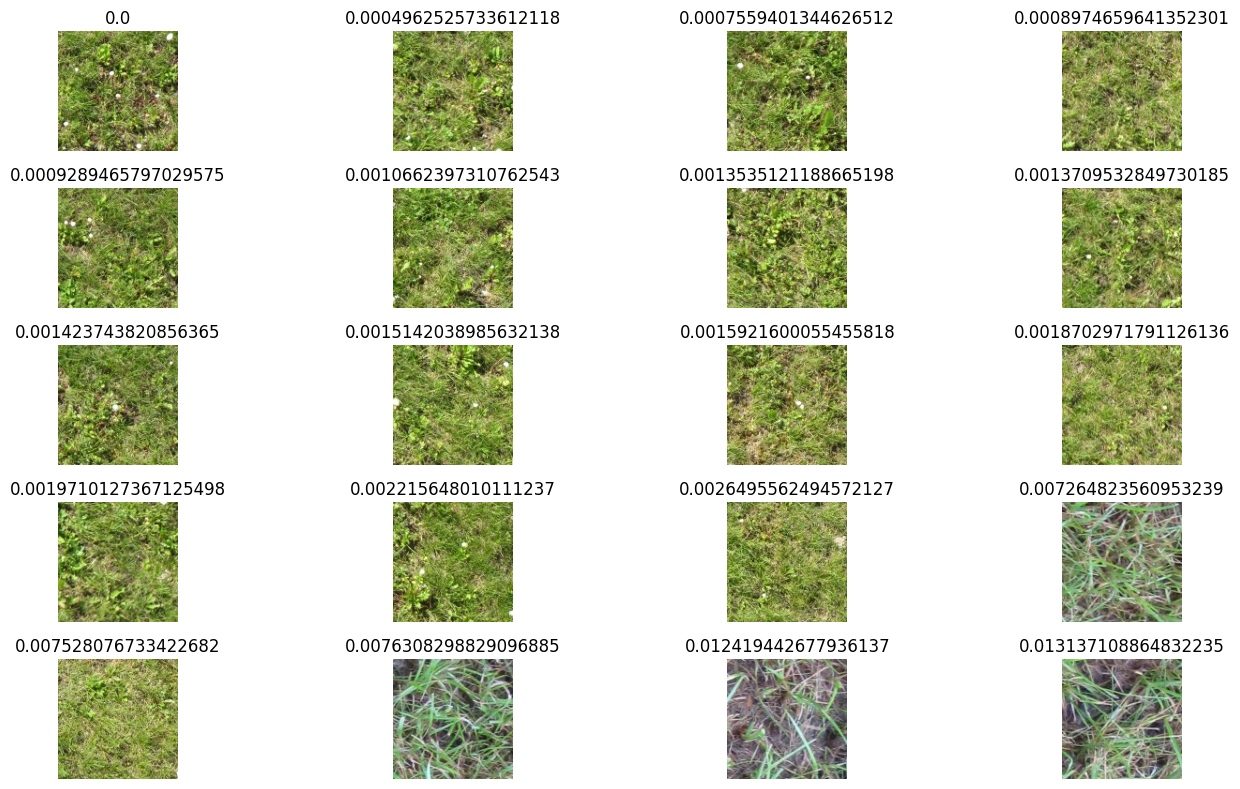

In [24]:
show_images(imresult,4,dresult)